In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model

In [4]:
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [5]:
df=pd.read_excel(URL)

In [7]:
df.shape

(768, 10)

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [14]:
train,test= train_test_split(df,test_size=0.2, random_state=42)

In [15]:
train.shape

(614, 10)

In [16]:
train_stats=train.describe()

In [17]:
train_stats.pop('Y1')
train_stats.pop('Y2')

count    614.000000
mean      24.410765
std        9.476566
min       10.900000
25%       15.640000
50%       21.500000
75%       32.920000
max       48.030000
Name: Y2, dtype: float64

In [18]:
train_stats.shape

(8, 8)

In [19]:
train_stats=train_stats.transpose()

In [20]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


In [21]:
train_Y=format_output(train)
test_Y=format_output(test)

In [24]:
train.shape

(614, 8)

In [25]:
norm_train_X=norm(train)
norm_test_X=norm(test)

In [39]:
input_layer=Input(shape=len(train.columns))
First_Dense=Dense(64,activation='relu')(input_layer)
Second_Dense=Dense(64,activation='relu')(First_Dense)

y1_output=Dense(1,name='y1_output')(Second_Dense)

Third_Dense=Dense(32,activation='relu')(Second_Dense)
y2_output=Dense(1,name='y2_output')(Third_Dense)

model=Model(inputs=input_layer,outputs=[y1_output,y2_output])
model.summary()



Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_30 (Dense)               (None, 64)           576         ['input_12[0][0]']               
                                                                                                  
 dense_31 (Dense)               (None, 64)           4160        ['dense_30[0][0]']               
                                                                                                  
 dense_32 (Dense)               (None, 32)           2080        ['dense_31[0][0]']               
                                                                                            

In [48]:
model.compile(optimizer='adam',loss={'y1_output':'mse','y2_output':'mse'},metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),'y2_output':tf.keras.metrics.RootMeanSquaredError()})

In [50]:
history=model.fit(norm_train_X,train_Y,epochs=2000,batch_size=10,validation_data=(norm_test_X,test_Y),verbose=1)

Epoch 1/2000
62/62 [==============================] - 1s 6ms/step - loss: 974.5959 - y1_output_loss: 468.4947 - y2_output_loss: 506.1012 - y1_output_root_mean_squared_error: 21.6447 - y2_output_root_mean_squared_error: 22.4967 - val_loss: 489.2375 - val_y1_output_loss: 298.2719 - val_y2_output_loss: 190.9656 - val_y1_output_root_mean_squared_error: 17.2705 - val_y2_output_root_mean_squared_error: 13.8190
Epoch 2/2000
62/62 [==============================] - 0s 3ms/step - loss: 187.3075 - y1_output_loss: 117.5695 - y2_output_loss: 69.7381 - y1_output_root_mean_squared_error: 10.8429 - y2_output_root_mean_squared_error: 8.3509 - val_loss: 78.8770 - val_y1_output_loss: 40.5583 - val_y2_output_loss: 38.3186 - val_y1_output_root_mean_squared_error: 6.3685 - val_y2_output_root_mean_squared_error: 6.1902
Epoch 3/2000
62/62 [==============================] - 0s 3ms/step - loss: 59.1591 - y1_output_loss: 28.5398 - y2_output_loss: 30.6193 - y1_output_root_mean_squared_error: 5.3423 - y2_output_r

In [42]:
from tensorflow.python.keras.utils.vis_utils import plot_model

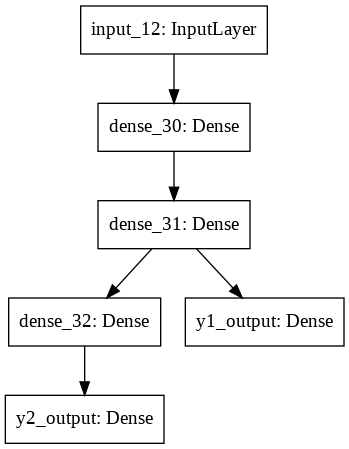

In [51]:
plot_model(model)

In [52]:
model.evaluate(norm_test_X,test_Y)

5/5 [==============================] - 0s 2ms/step - loss: 0.6995 - y1_output_loss: 0.2462 - y2_output_loss: 0.4533 - y1_output_root_mean_squared_error: 0.4962 - y2_output_root_mean_squared_error: 0.6733


[0.6994837522506714,
 0.24619734287261963,
 0.45328640937805176,
 0.49618276953697205,
 0.6732654571533203]

In [53]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

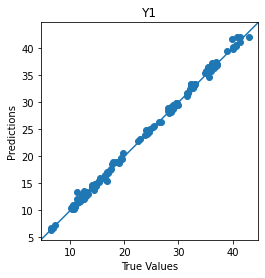

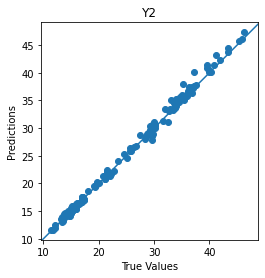

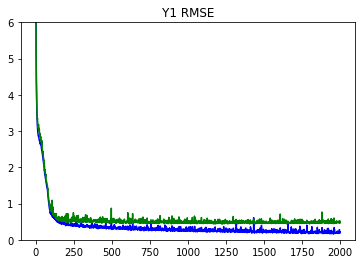

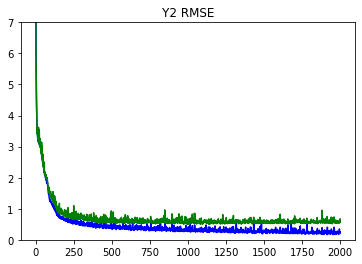

In [54]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)